# <center>Gestión Segura de Datos de Clientes<center>

Implementar un sistema básico de gestión y análisis de datos de clientes, aplicando técnicas de pseudonimización, anonimización y balanceo de datos

1. Cargar datos
2. Aplicar técnicas de anonimización (direccion, edad y salario)
3. Aplicar técnicas de pseudonimización (nombre)
4. Implementar función de balanceo de datos (Representación equitativa de diversas categorías)
5. Visualización de datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

### Cargar datos

In [9]:
df = pd.read_csv('../Python para Data Science/Datasets/clientes.csv')
df.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


### Anonimización

In [10]:
# Anonimizar la direccion a traves de eliminacion
df.drop('direccion', axis=1, inplace=True)
df.head()

,nombre,edad,categoria,salario
0,Richard Martin,62,0,61050
1,James Jones,65,1,53824
2,Patricia Wilson,18,0,60281
3,Elizabeth Robinson,21,1,42187
4,Charles Brown,21,1,37589


In [11]:
# Anonimizar la edad a través de redondeo
df['edad'] = np.round(df['edad'] // 10) * 10
df.head()

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61050
1,James Jones,60,1,53824
2,Patricia Wilson,10,0,60281
3,Elizabeth Robinson,20,1,42187
4,Charles Brown,20,1,37589


In [12]:
# Anonimizar el salario a través de agregación de ruido
ruido = np.random.normal(0, 100, df["salario"].shape)
df["salario"] += ruido
df.head()

,nombre,edad,categoria,salario
0,Richard Martin,60,0,60961.105023
1,James Jones,60,1,53929.397370
2,Patricia Wilson,10,0,60384.354520
3,Elizabeth Robinson,20,1,42303.192688
4,Charles Brown,20,1,37550.790714


### Pseudonimización

In [13]:
for i in range(len(df)):
    df.loc[i, 'nombre'] = 'Cliente ' + str(i)
df.head()

,nombre,edad,categoria,salario
0,Cliente 0,60,0,60961.105023
1,Cliente 1,60,1,53929.397370
2,Cliente 2,10,0,60384.354520
3,Cliente 3,20,1,42303.192688
4,Cliente 4,20,1,37550.790714


### Balancear Datos

In [14]:
agrupado = df.groupby('categoria')
df_balanceado = pd.DataFrame()

for nombre, grupo in agrupado:
    grupo_balanceado = resample(grupo, n_samples=100, replace=True, random_state=123) # random_state=123 para reproducibilidad
    df_balanceado = pd.concat([df_balanceado, grupo_balanceado])

df_balanceado.head()

,nombre,edad,categoria,salario
158,Cliente 158,50,0,41571.102960
42,Cliente 42,30,0,59299.960062
194,Cliente 194,40,0,49801.051484
133,Cliente 133,50,0,41766.743348
114,Cliente 114,60,0,53500.370494


### Visualización de Datos

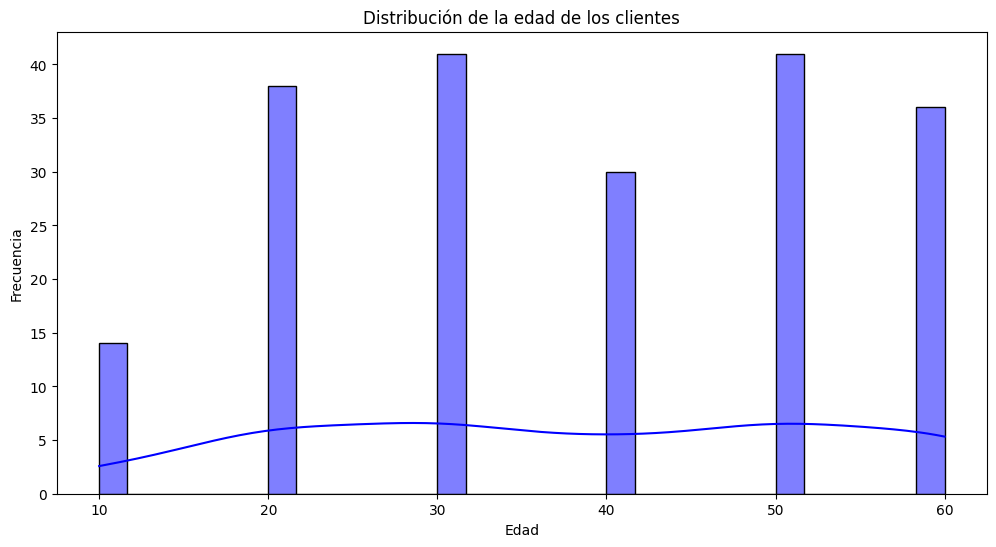

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df['edad'], kde=True, color='blue', bins=30)
plt.title('Distribución de la edad de los clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

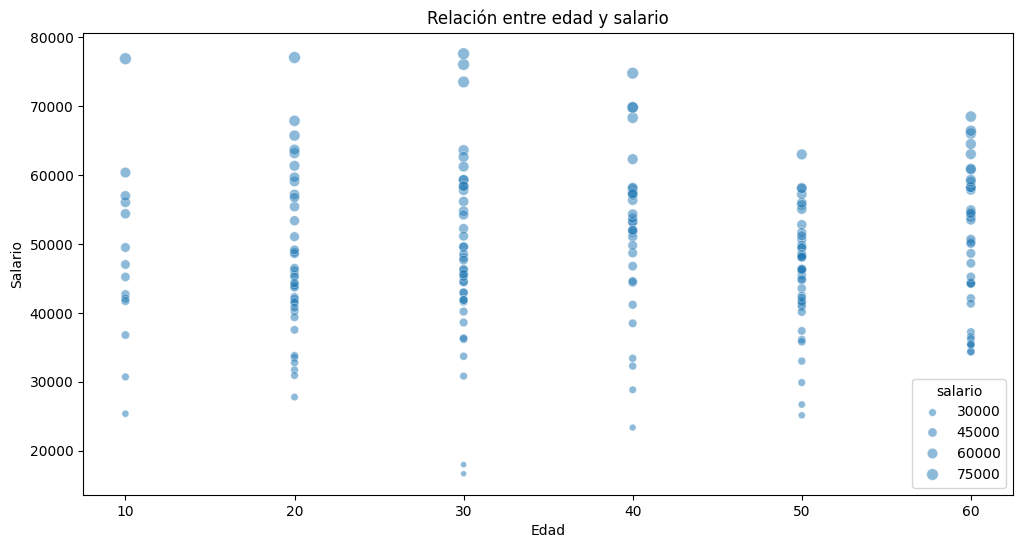

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='edad', y='salario', size='salario', data=df, alpha=0.5)
plt.title('Relación entre edad y salario')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

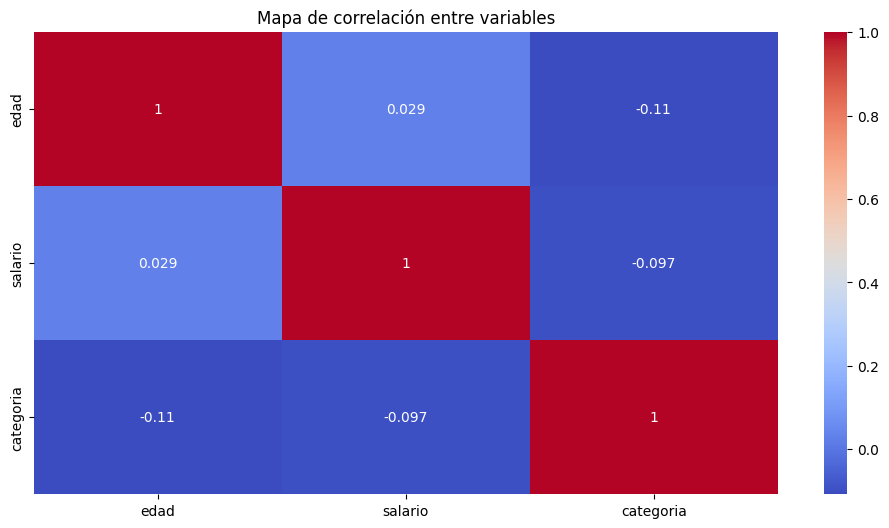

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[["edad", "salario", "categoria"]].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación entre variables')
plt.show()